In [1]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [4]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.HAR_SENSE)
dataset = HARDataset(cfg, parse, override_cache=False)

Creating config hash...
Loading config hash...


Loading windows: 100%|██████████| 523/523 [00:00<00:00, 1925.25it/s]


In [5]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
3     60
7     58
2     50
1     48
10    46
11    46
6     45
4     42
8     41
5     36
12    31
9     20
Name: count, dtype: int64
activity_id
5    182
2    137
1    111
3     93
Name: count, dtype: int64
train: 380 | val: 66 | test: 77


In [6]:
weights = dataset.get_class_weights(test_loader)
len(weights)

3

In [7]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos
0,-7.942041,27.394691,-3.861184,-6.030616,31.702774,-2.975931,-1.210538,9.708571,-0.669795,-0.043313,1.994713,-2.831350,0.696994,-0.222190,-0.309762,0.607354
1,-4.636281,7.531384,0.493796,-2.831529,-2.968714,2.112738,-2.489853,9.477827,-0.376553,-0.494985,0.189091,0.286676,0.701245,-0.175582,-0.331776,0.606095
2,-4.756055,9.969981,0.182384,-1.870305,1.045851,0.329831,-2.426243,9.494250,-0.378070,0.440316,0.072978,-0.073383,0.697470,-0.176665,-0.331700,0.610164
3,-3.515197,8.072762,0.455468,-2.022067,-1.215675,0.492363,-2.453819,9.482470,-0.481572,0.011015,0.994431,-0.002010,0.701974,-0.175907,-0.330047,0.606101
4,-1.680260,7.665531,-2.088530,0.496550,-0.709084,-0.643387,-2.450130,9.474987,-0.626008,0.134586,0.801618,-0.049947,0.710700,-0.161287,-0.313913,0.608564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,8.213066,8.757869,10.344004,5.373640,-0.600650,18.237608,-4.196803,8.169887,-3.436597,-0.226539,1.898839,-1.366613,0.772725,0.280434,-0.073266,0.564698
124,8.112456,-0.579706,-11.866873,6.356495,-19.232338,13.482592,-4.605231,8.402675,-2.087415,-0.932808,-6.236578,0.681889,0.761550,0.244119,-0.119138,0.588433
125,-4.607535,0.043118,-1.024937,1.215172,-9.266330,0.426183,-4.176539,8.600466,-2.181488,-2.492354,3.022692,0.303720,0.745058,0.247630,-0.092614,0.612365
126,-3.428959,4.010031,0.608779,0.380683,-4.974792,0.576670,-3.900237,8.897916,-1.336274,-2.478506,1.168069,0.991881,0.715083,0.251492,-0.054597,0.649944


torch.Size([32, 128, 16])


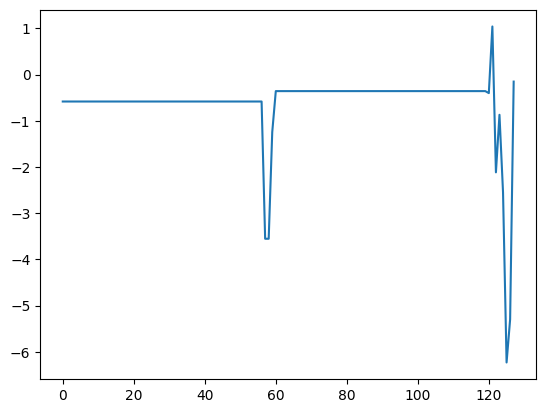

In [45]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()